# Public Alpha Signalling
### Prepared by Matt Barlin, Lead Systems Engineer, BlockScience

The purpose of this notebook explores the public information signal with which attestors will respond with their own information and objective to determine their action. 
With an assumed data feed of public, yet informal, information of project progress, an agent will have a set of possible signals with which to make their own determination of project progress. 

In [1]:
# For displaying image files
from IPython.display import Image

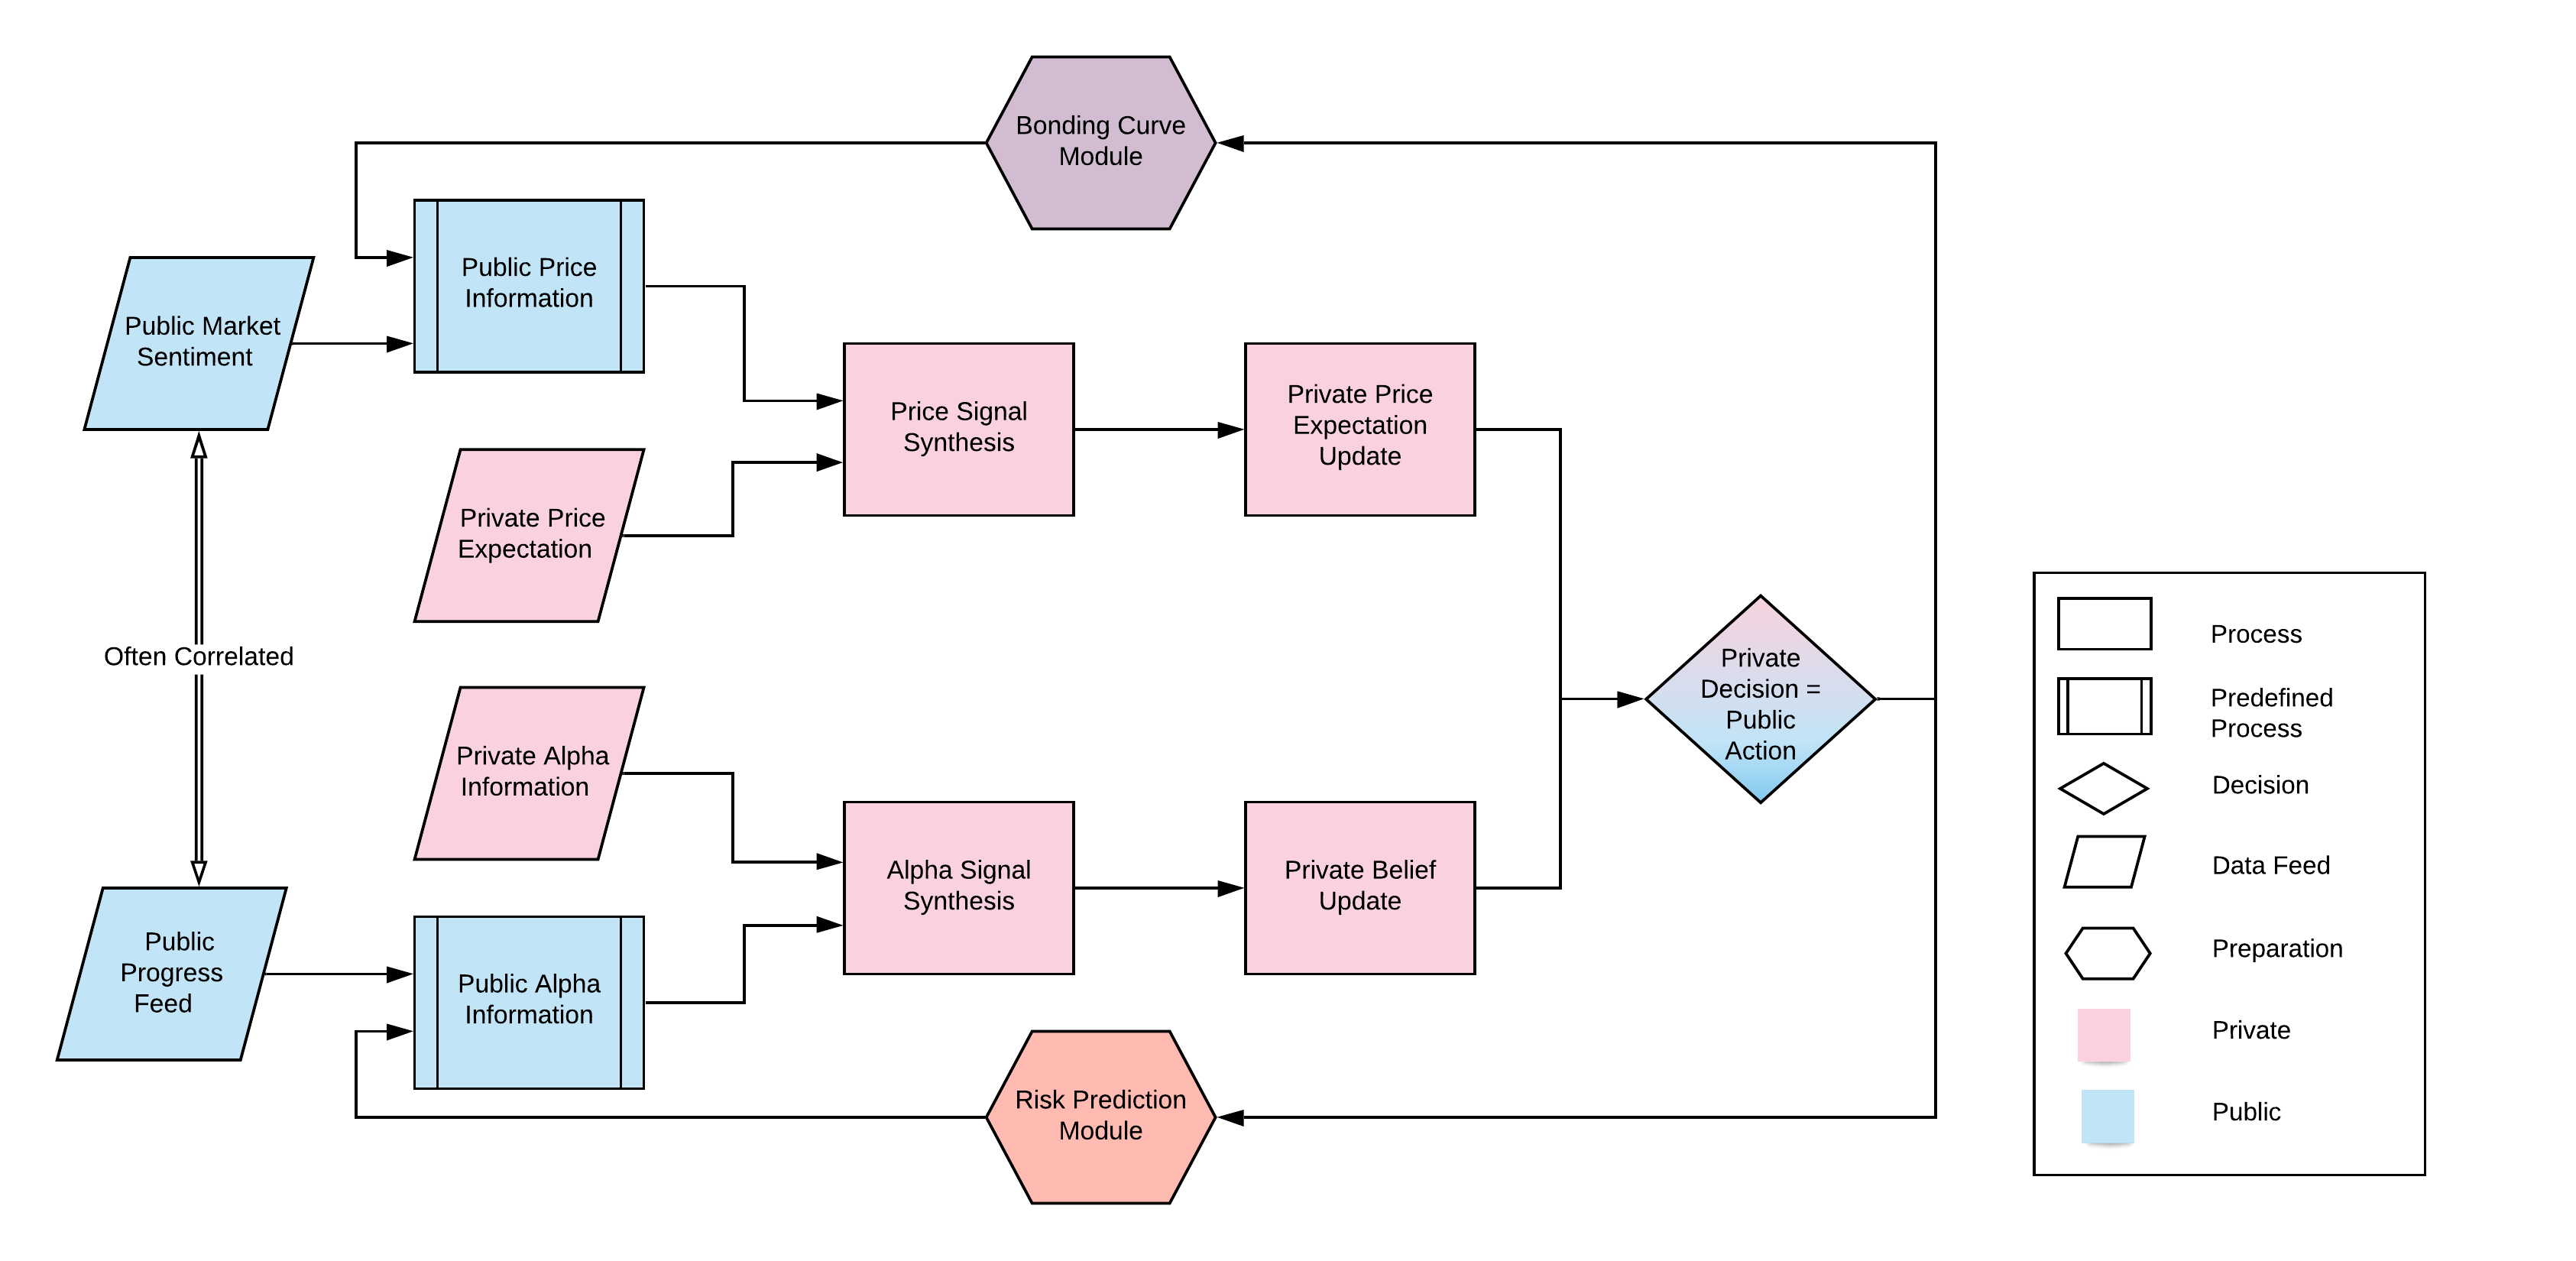

In [41]:
Image("images/alpha_agent_block.png")

### Import Model Configuration Object

#### Import Python Libraries for Analysis and Plotting

#### Output is the configuration dictionary containing

'N' = Number of Monte Carlo Runs, running multiple simulations of the same system.

'T' = Computer simulations run in discrete time. The length of the simulation in timesteps.

'M' = Dictionary of system parameter values being tested. Any parameter listed in the M dictionary may be swept over a range of values.

In [3]:


# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

Expected Milestone Coarse

Assumed Major Milestones in Project = 4

Milestone Dataframe : {Milestone Name, Time/ Date, Percent Completion}

In [4]:
from src.sim.sim_setup import SIMULATION_TIME_STEPS, MONTE_CARLO_RUNS

In [5]:
MILESTONES = [0, 1,2,3,4]
milestone_df = pd.DataFrame(MILESTONES, columns = ['Name'])
milestone_df['Completion_Time'] =  SIMULATION_TIME_STEPS * milestone_df.Name // (max(MILESTONES))
milestone_df['Completion_Percent'] = 100 * milestone_df.Name // (max(MILESTONES) )



In [6]:
milestone_df

,Name,Completion_Time,Completion_Percent
0,0,0,0
1,1,91,25
2,2,182,50
3,3,273,75
4,4,365,100


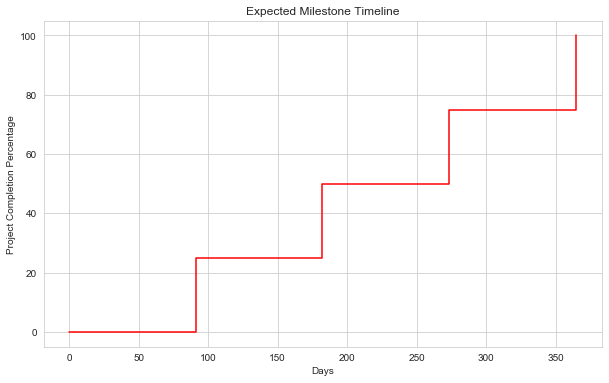

In [7]:
plt.figure(figsize=(10,6))
plt.step(milestone_df.Completion_Time, milestone_df.Completion_Percent, where='post', color='r', label='Milestone')
plt.xlabel('Days')
plt.ylabel('Project Completion Percentage')
plt.title('Expected Milestone Timeline')

plt.show()

The more granular information signal is the claims signal.
The magnitude of the claim marks the incremental progress toward completion. Variable is used as the expected mean of the magnitude.
The frequency is the expected occurrence rate of the claim.
The standard deviation is the deviation on the magnitude of the claim.

The product of the expected frequency (reciprocal) and the magnitude should equal the appropriate milestone completion event.

In [8]:

CLAIM_GRAN_FACTOR = 1
CLAIMS_MAGNITUDE = 100 / (CLAIM_GRAN_FACTOR* SIMULATION_TIME_STEPS) #[1] # tablet use, function of activity + adoption
CLAIMS_FREQUENCY = 1 / SIMULATION_TIME_STEPS #[1]  # 1 =daily
# CLAIMS_STD = [0.5, 1, 2] # 3 values for parmater sweep, 1 for test
CLAIMS_STD =  CLAIMS_MAGNITUDE / CLAIM_GRAN_FACTOR  #[ 0.1] # 3 values for parmater sweep, 1 for test

random = np.random.normal(CLAIMS_MAGNITUDE, scale = CLAIMS_STD)
random

0.4982886753337853

In [9]:
claim_signal = [0]
freq = CLAIMS_FREQUENCY * SIMULATION_TIME_STEPS
check = np.random.poisson(freq,SIMULATION_TIME_STEPS)
for i in range(SIMULATION_TIME_STEPS):

    random = np.random.normal(CLAIMS_MAGNITUDE, scale = CLAIMS_STD)

    new_value = claim_signal[i] + random
    claim_signal.append(new_value)
# print(claim_signal)

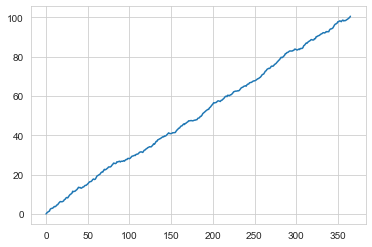

In [10]:
plt.plot(claim_signal)

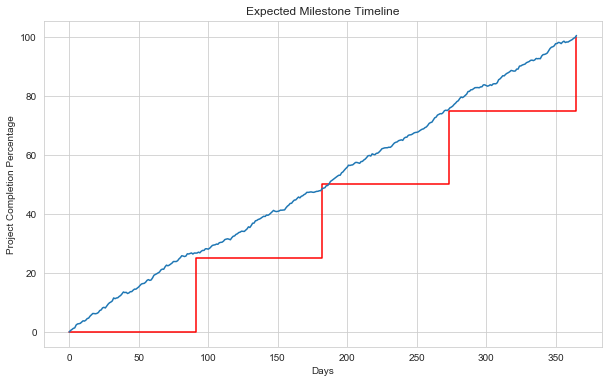

In [11]:
plt.figure(figsize=(10,6))
plt.step(milestone_df.Completion_Time, milestone_df.Completion_Percent, where='post', color='r', label='Milestone')
plt.plot(claim_signal)
plt.xlabel('Days')
plt.ylabel('Project Completion Percentage')
plt.title('Expected Milestone Timeline')

plt.show()

In [12]:
claim_signal = [0]
freq = CLAIMS_FREQUENCY * SIMULATION_TIME_STEPS
check = np.random.poisson(freq,SIMULATION_TIME_STEPS)
for i in range(SIMULATION_TIME_STEPS):
  
    
    
    # expected but randomized through poisson
    if check[i] > 0:
        random = np.random.normal(CLAIMS_MAGNITUDE, scale = CLAIMS_STD)
    else:
        random = 0
    new_value = claim_signal[i] + random
    claim_signal.append(new_value)

In [13]:
# Import configuration
from src.sim import run

0.273972602739726

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (365, 6, 3, 6)
Execution Method: parallelize_simulations
Execution Mode: parallelized
Total execution time: 2.56s
config_ids =  [{'M': {'CLAIMS_MAGNITUDE': 0.273972602739726, 'CLAIMS_FREQUENCY': 1, 'CLAIMS_STD': 0.25, 'MILESTONE_MAGNITUDE': 100, 'MILESTONE_FREQUENCY': 10, 'MILESTONE_THRESHOLD': 0.8}, 'simulation_id': 0, 'run_id': 0, 'subset_id': 0}, {'M': {'CLAIMS_MAGNITUDE': 0.273972602739726, 'CLAIMS_FREQUENCY': 1, 'CLAIMS_STD': 0.5, 'MILESTONE_MAGNITUDE': 100, 'MILESTONE_FREQUENCY': 10, 'MILESTONE_THRESHOLD': 0.8}, 'simulation_id': 0, 'run_id': 1, 'subset_id': 1}, {'M': {'CLAIMS_MAGNITUDE': 0.273972602739726, 'CLAIMS_FREQUENCY': 1, 'CLAIMS_STD': 0.

### cadCAD Specification
A Partial State Update Block (PSUB) is a set of State Update Functions and Policy Functions such that State Update Functions in the set are independent from each other and Policies in the set are independent from each other and from the State Update Functions in the set. In other words, if a state variable is updated in a PSUB, its new value cannot impact the State Update Functions and Policy Functions in that PSUB - only those in the next PSUB. The partial state update block for the Adoption Funnel is implemented according to the specification below.

### Run cadCAD Simulation
A Simulation execution produces a System Event Dataset and the Tensor Field applied to initial states used to create it.
Execute Simulation to produce the System Event Dataset, labeled "experiments"

In [14]:
experiments = run.run()

config_ids =  [{'M': {'CLAIMS_MAGNITUDE': 0.273972602739726, 'CLAIMS_FREQUENCY': 1, 'CLAIMS_STD': 0.25, 'MILESTONE_MAGNITUDE': 100, 'MILESTONE_FREQUENCY': 10, 'MILESTONE_THRESHOLD': 0.8}, 'simulation_id': 0, 'run_id': 0, 'subset_id': 0}, {'M': {'CLAIMS_MAGNITUDE': 0.273972602739726, 'CLAIMS_FREQUENCY': 1, 'CLAIMS_STD': 0.5, 'MILESTONE_MAGNITUDE': 100, 'MILESTONE_FREQUENCY': 10, 'MILESTONE_THRESHOLD': 0.8}, 'simulation_id': 0, 'run_id': 1, 'subset_id': 1}, {'M': {'CLAIMS_MAGNITUDE': 0.273972602739726, 'CLAIMS_FREQUENCY': 1, 'CLAIMS_STD': 0.75, 'MILESTONE_MAGNITUDE': 100, 'MILESTONE_FREQUENCY': 10, 'MILESTONE_THRESHOLD': 0.8}, 'simulation_id': 0, 'run_id': 2, 'subset_id': 2}]
   timestamp  public_alpha                                          milestone  \
0 2020-01-01             0     Name  Completion_Time  Completion_Percent
0...   
1 2020-01-01             0     Name  Completion_Time  Completion_Percent
0...   
2 2020-01-01             0     Name  Completion_Time  Completion_Percent
0

In [15]:
experiments.head()

,index,CLAIMS_MAGNITUDE,CLAIMS_FREQUENCY,CLAIMS_STD,MILESTONE_MAGNITUDE,MILESTONE_FREQUENCY,MILESTONE_THRESHOLD,dataset
0,0,0.273973,1,0.25,100,10,0.8,timestamp public_alpha \ 0 2020-01-01...
1,0,0.273973,1,0.50,100,10,0.8,timestamp public_alpha \ 731 2020-01-...
2,0,0.273973,1,0.75,100,10,0.8,timestamp public_alpha \ 1462 2020-01-...


In [16]:
experiments.tail()

,index,CLAIMS_MAGNITUDE,CLAIMS_FREQUENCY,CLAIMS_STD,MILESTONE_MAGNITUDE,MILESTONE_FREQUENCY,MILESTONE_THRESHOLD,dataset
0,0,0.273973,1,0.25,100,10,0.8,timestamp public_alpha \ 0 2020-01-01...
1,0,0.273973,1,0.50,100,10,0.8,timestamp public_alpha \ 731 2020-01-...
2,0,0.273973,1,0.75,100,10,0.8,timestamp public_alpha \ 1462 2020-01-...


### View Head of First Experiment Results

In [17]:
print(experiments.dataset[0].head())

timestamp  public_alpha                                          milestone  \
0 2020-01-01             0     Name  Completion_Time  Completion_Percent
0...   
2 2020-01-01             0     Name  Completion_Time  Completion_Percent
0...   
4 2020-01-01             0     Name  Completion_Time  Completion_Percent
0...   
6 2020-01-01             0     Name  Completion_Time  Completion_Percent
0...   
8 2020-01-01             0     Name  Completion_Time  Completion_Percent
0...   

   milestone_progress  expected_milestone_interpolation  \
0            0.000000                          0.000000   
2            0.197876                          0.273973   
4            0.557406                          0.547945   
6            0.382910                          0.821918   
8            0.928467                          1.095890   

   milestone_difference_signal  simulation  subset  run  substep  timestep  
0                     0.000000           0       0    1        0         0  
2      

Collect some keys for investigation at selected timesteps.

In [18]:
first_experiment = experiments.dataset[0]

## Input Driving Signal is the Public Alpha Information Signal
 This signal consists of a noisy, high frequency, low amplitude CLAIMS SIGNAL and a large amplitude, low frequency MILESTONE SIGNAL.

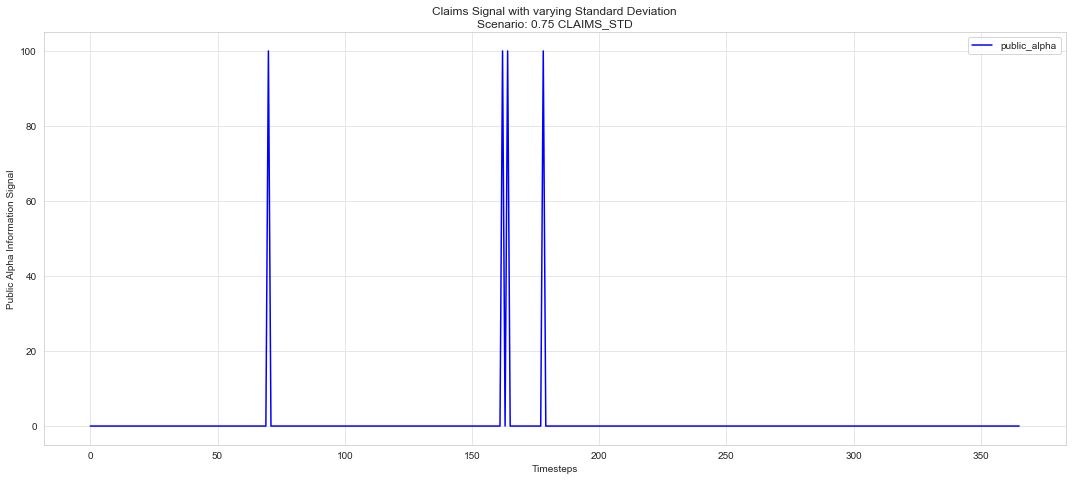

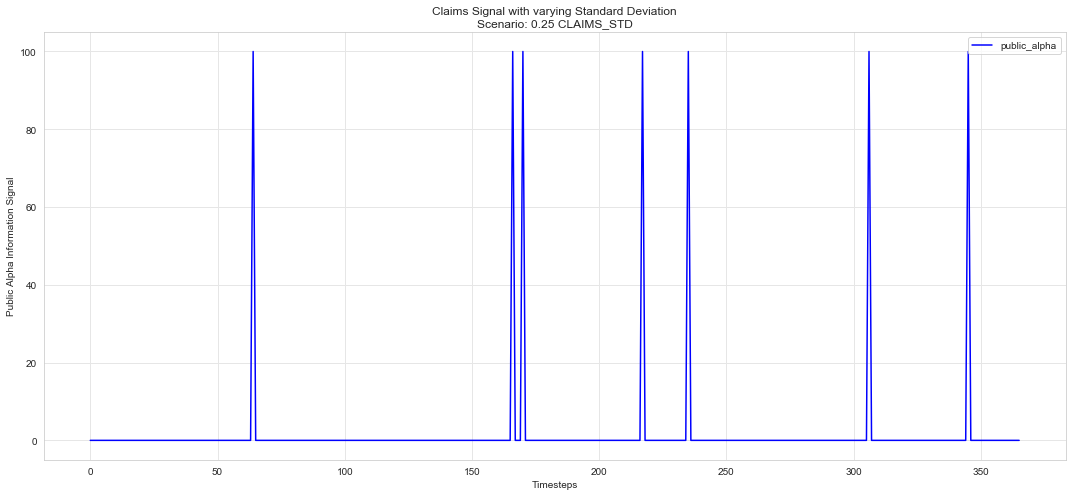

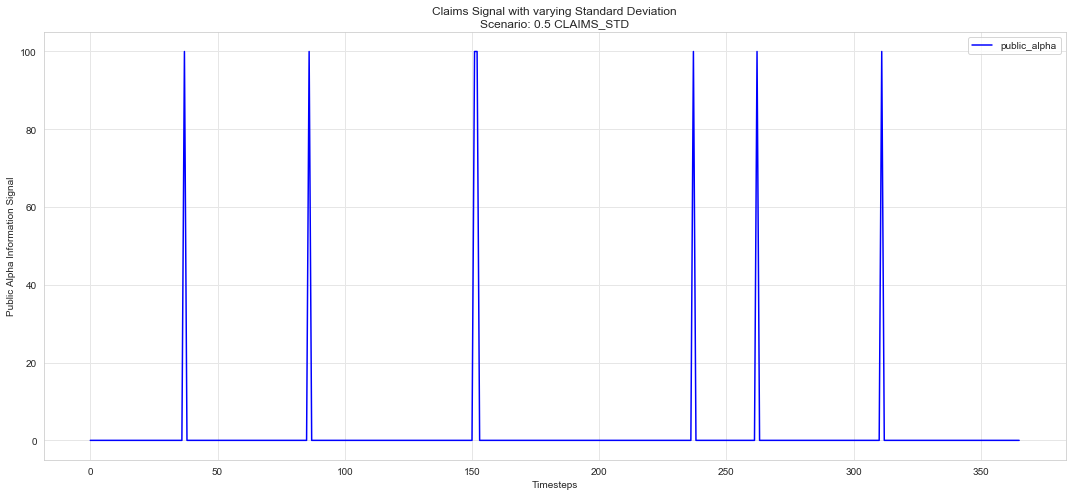

In [19]:
experiments = experiments.sort_values(by =['CLAIMS_STD']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['CLAIMS_STD']
    cc_label = experiments.iloc[cc_idx]['CLAIMS_STD']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['CLAIMS_STD']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()

        plot_label = experiment['CLAIMS_STD']
        ax = axs
        title = 'Claims Signal with varying Standard Deviation' + '\n' + 'Scenario: ' + str(cc_label)  + ' CLAIMS_STD'
        ax.set_title(title)
        ax.set_ylabel('Public Alpha Information Signal')
        colors = ['b','orange', 'g', 'magenta', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df.timestep, df['public_alpha'],color = colors[0], label='public_alpha')



        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

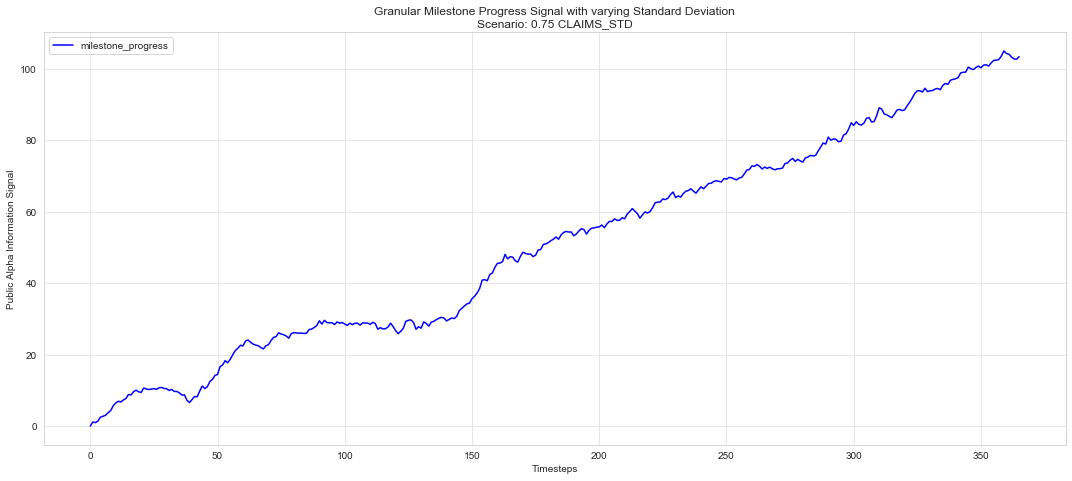

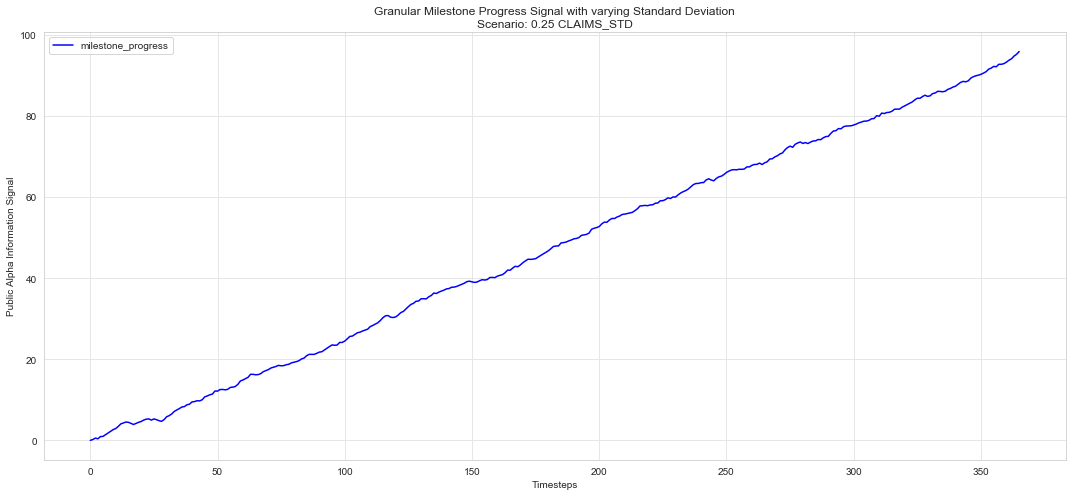

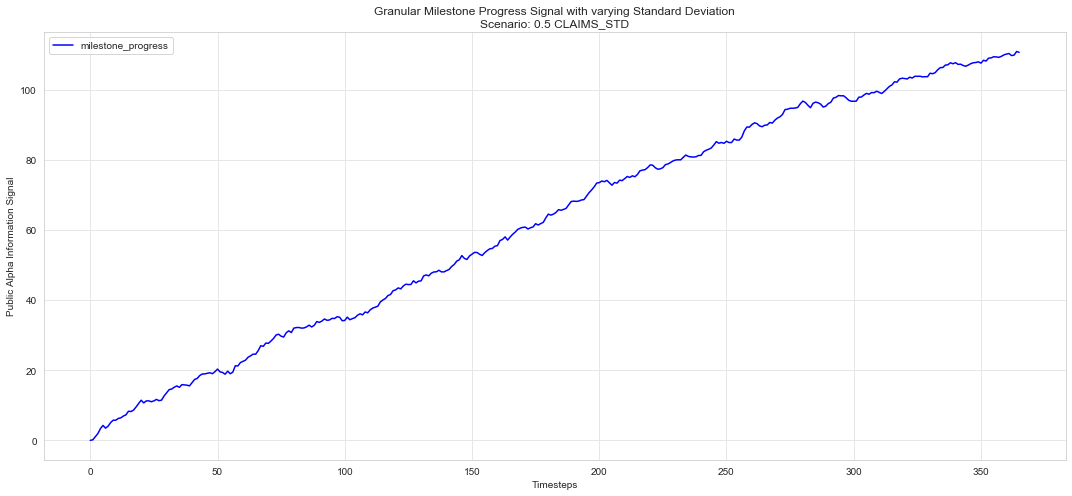

In [20]:
experiments = experiments.sort_values(by =['CLAIMS_STD']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['CLAIMS_STD']
    cc_label = experiments.iloc[cc_idx]['CLAIMS_STD']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['CLAIMS_STD']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()

        plot_label = experiment['CLAIMS_STD']
        ax = axs
        title = 'Granular Milestone Progress Signal with varying Standard Deviation' + '\n' + 'Scenario: ' + str(cc_label)  + ' CLAIMS_STD'
        ax.set_title(title)
        ax.set_ylabel('Public Alpha Information Signal')
        colors = ['b','orange', 'g', 'magenta', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df.timestep, df['milestone_progress'],color = colors[0], label='milestone_progress')



        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

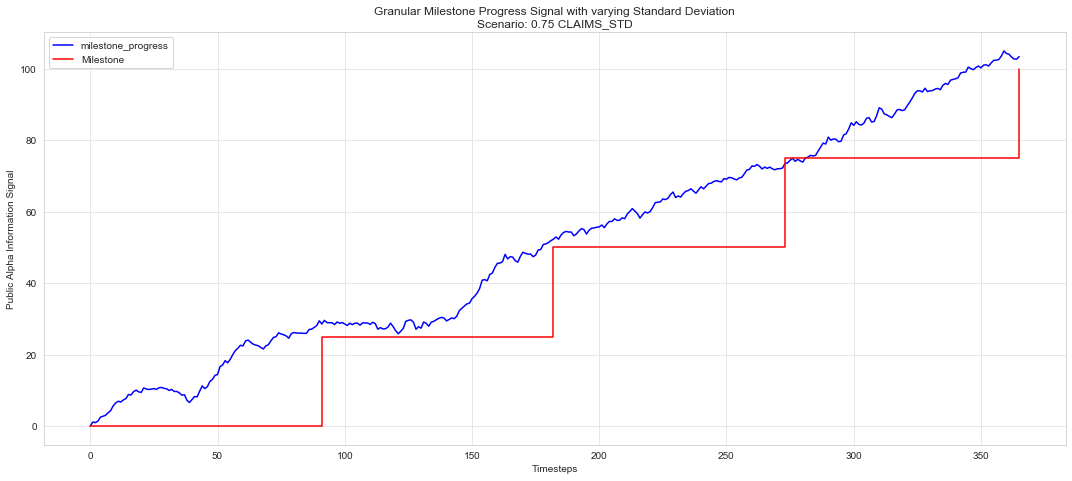

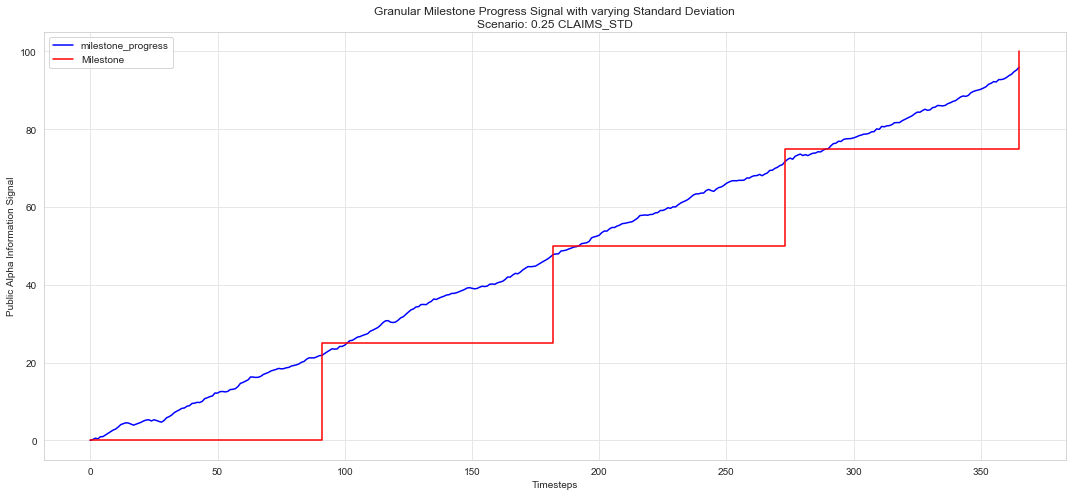

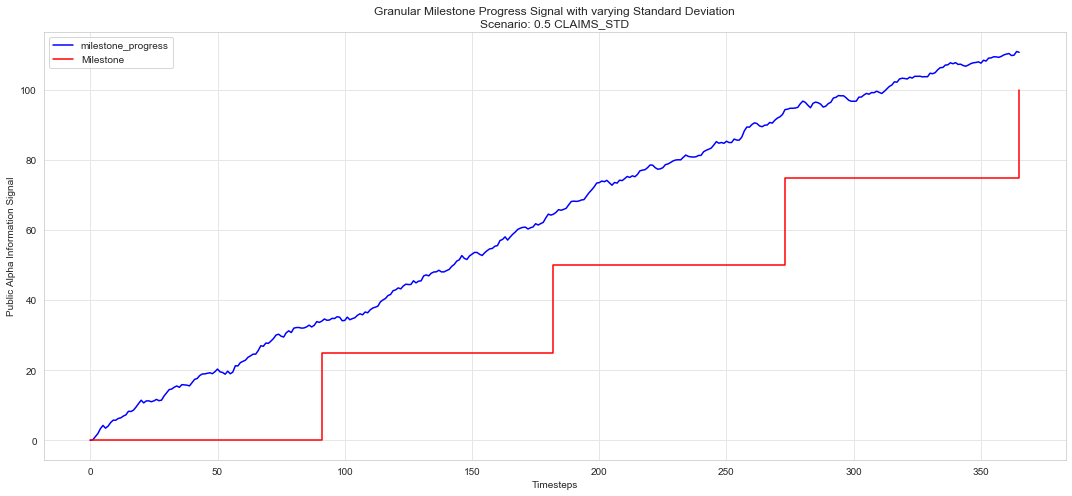

In [21]:
experiments = experiments.sort_values(by =['CLAIMS_STD']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['CLAIMS_STD']
    cc_label = experiments.iloc[cc_idx]['CLAIMS_STD']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['CLAIMS_STD']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()

        plot_label = experiment['CLAIMS_STD']
        ax = axs
        title = 'Granular Milestone Progress Signal with varying Standard Deviation' + '\n' + 'Scenario: ' + str(cc_label)  + ' CLAIMS_STD'
        ax.set_title(title)
        ax.set_ylabel('Public Alpha Information Signal')
        colors = ['b','orange', 'g', 'magenta', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df.timestep, df['milestone_progress'],color = colors[0], label='milestone_progress')


        ax.step(milestone_df.Completion_Time, milestone_df.Completion_Percent, where='post', color='r', label='Milestone')

        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

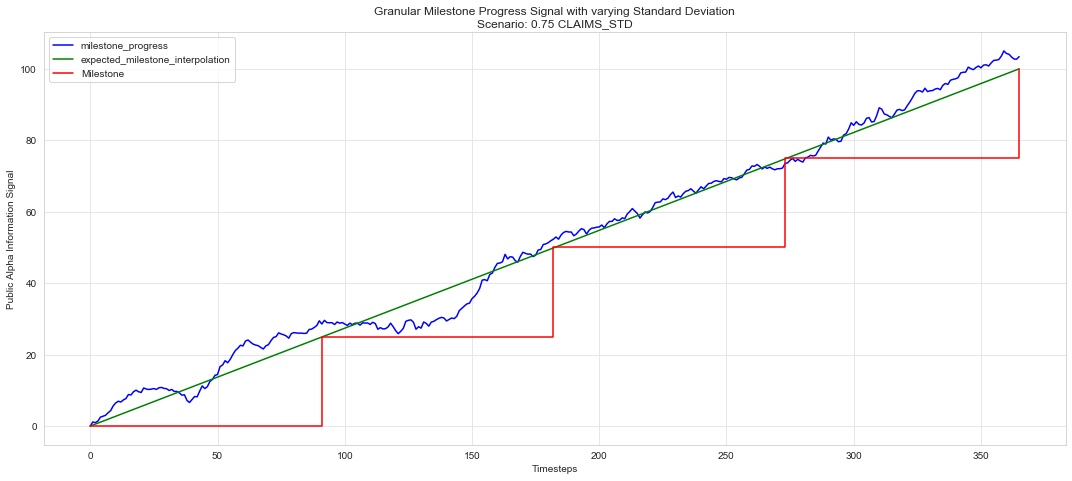

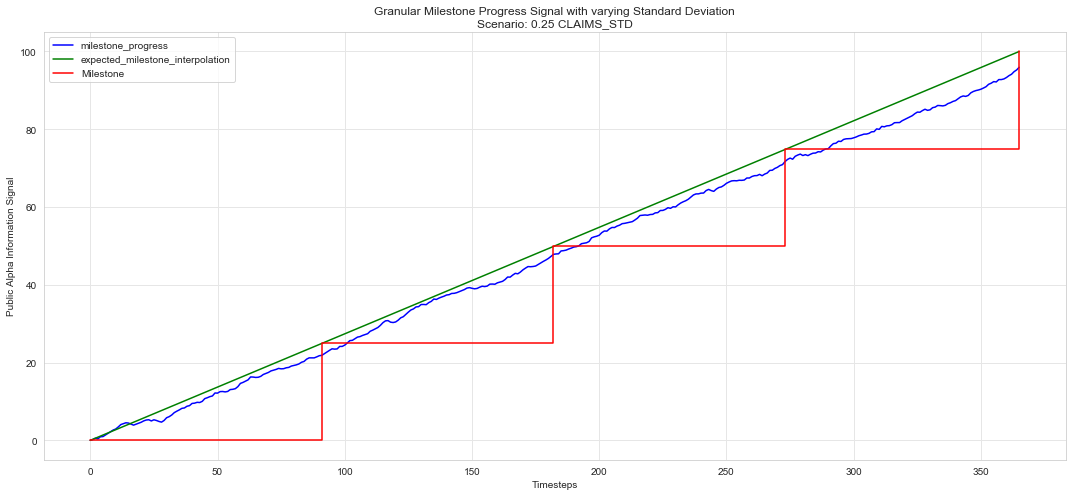

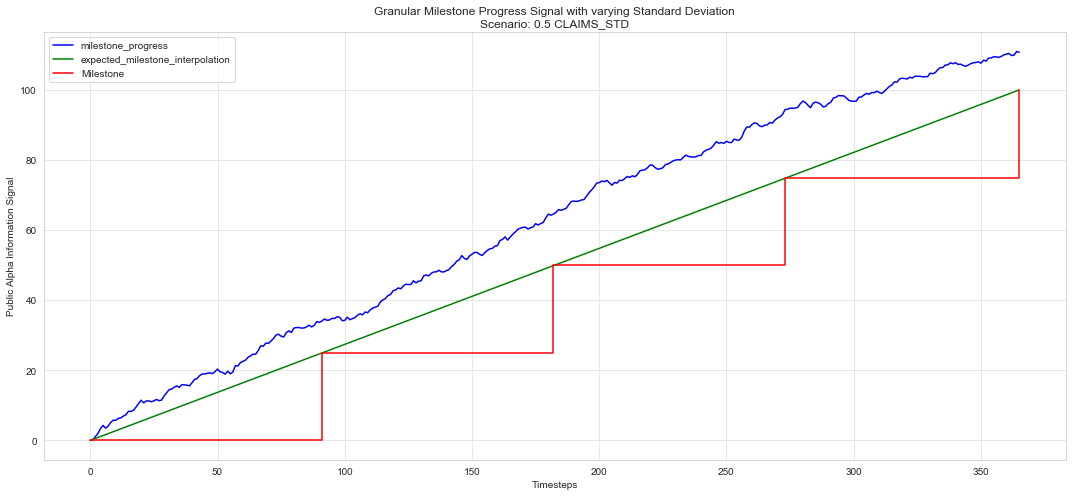

In [22]:
experiments = experiments.sort_values(by =['CLAIMS_STD']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['CLAIMS_STD']
    cc_label = experiments.iloc[cc_idx]['CLAIMS_STD']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['CLAIMS_STD']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()

        plot_label = experiment['CLAIMS_STD']
        ax = axs
        title = 'Granular Milestone Progress Signal with varying Standard Deviation' + '\n' + 'Scenario: ' + str(cc_label)  + ' CLAIMS_STD'
        ax.set_title(title)
        ax.set_ylabel('Public Alpha Information Signal')
        colors = ['b','orange', 'g', 'magenta', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df.timestep, df['milestone_progress'],color = colors[0], label='milestone_progress')
        ax.plot(df.timestep, df['expected_milestone_interpolation'],color = colors[2], label='expected_milestone_interpolation')


        ax.step(milestone_df.Completion_Time, milestone_df.Completion_Percent, where='post', color='r', label='Milestone')

        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

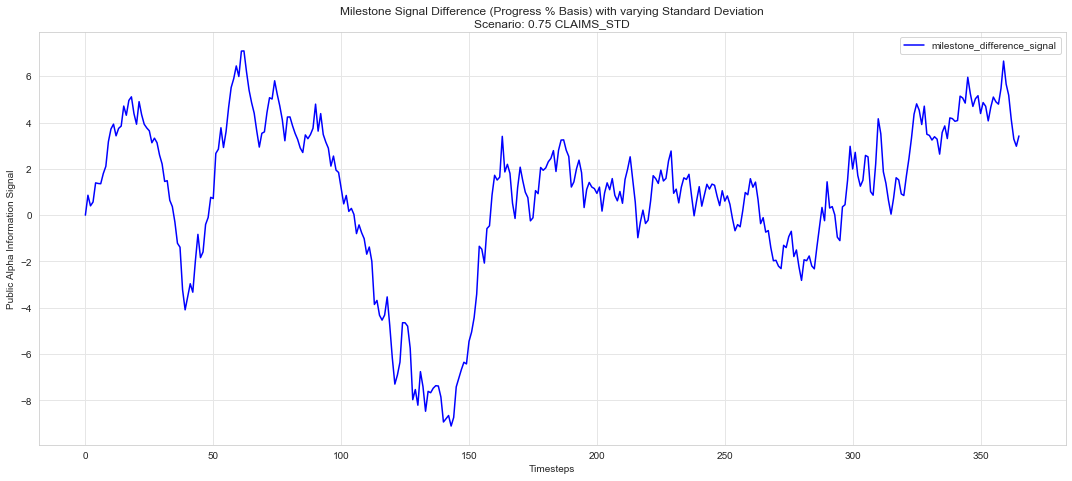

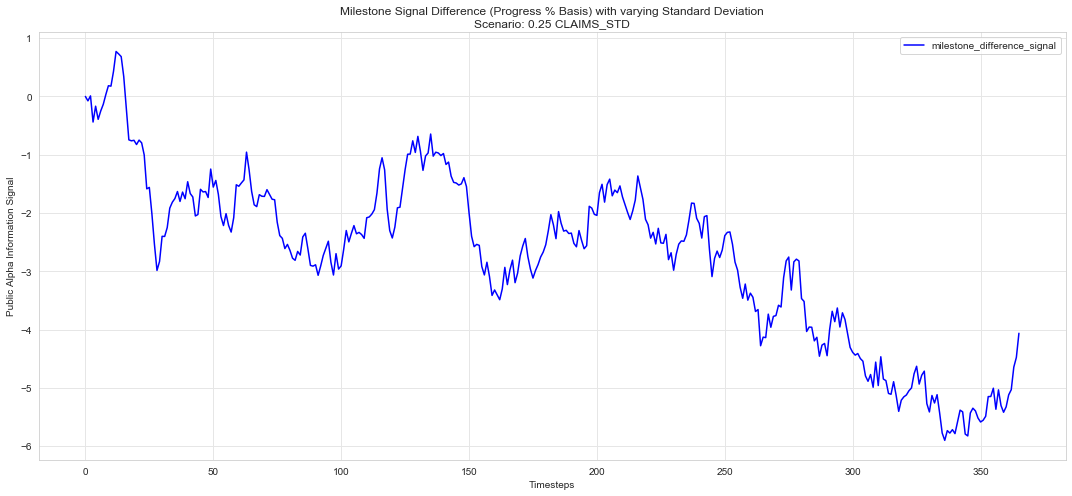

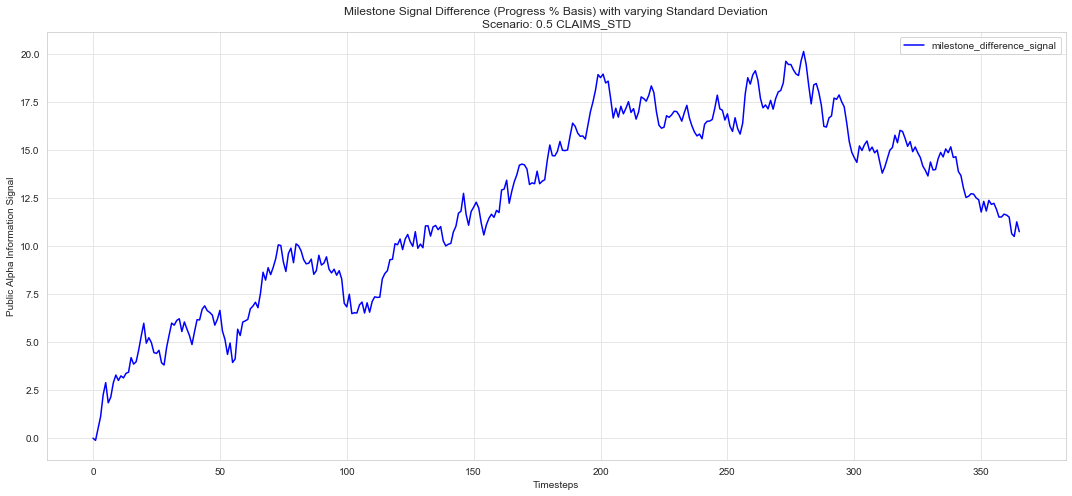

In [23]:
experiments = experiments.sort_values(by =['CLAIMS_STD']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['CLAIMS_STD']
    cc_label = experiments.iloc[cc_idx]['CLAIMS_STD']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['CLAIMS_STD']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()

     
        plot_label = experiment['CLAIMS_STD']
        ax = axs
        title = 'Milestone Signal Difference (Progress % Basis) with varying Standard Deviation' + '\n' + 'Scenario: ' + str(cc_label)  + ' CLAIMS_STD'
        ax.set_title(title)
        ax.set_ylabel('Public Alpha Information Signal')
        colors = ['b','orange', 'g', 'magenta', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df.timestep, df['milestone_difference_signal'],color = colors[0], label='milestone_difference_signal')
        # ax.plot(df.timestep, df['expected_milestone_interpolation'],color = colors[2], label='expected_milestone_interpolation')


        # ax.step(milestone_df.Completion_Time, milestone_df.Completion_Percent, where='post', color='r', label='Milestone')

        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

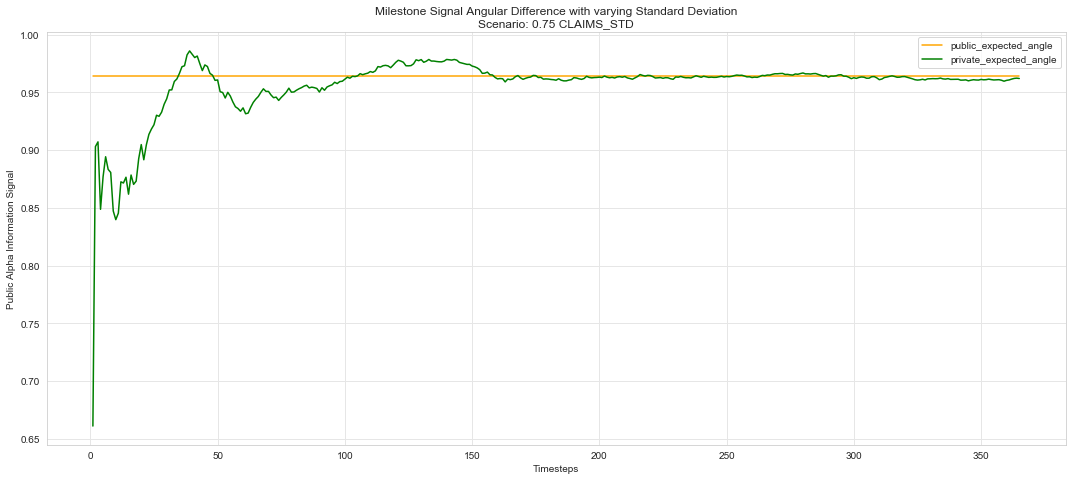

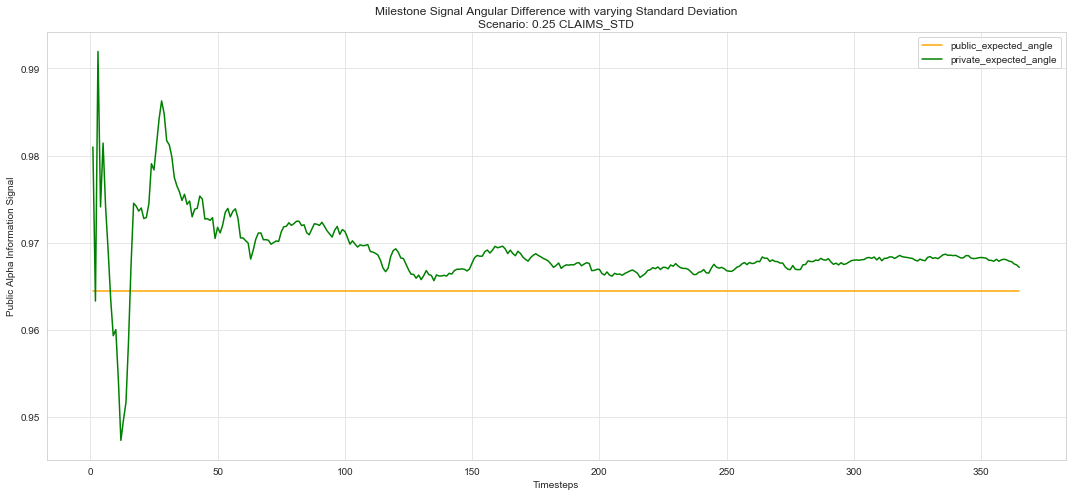

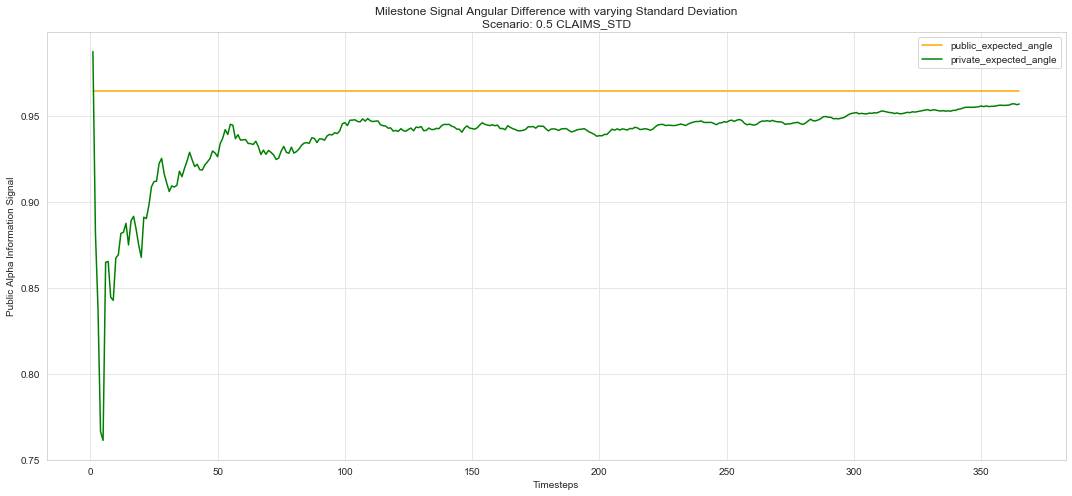

In [24]:
experiments = experiments.sort_values(by =['CLAIMS_STD']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['CLAIMS_STD']
    cc_label = experiments.iloc[cc_idx]['CLAIMS_STD']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['CLAIMS_STD']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        
        df['public_expected_angle'] = df['timestep'] / np.sqrt((df['expected_milestone_interpolation'])**2 + (df['timestep'])**2) 

        df['private_expected_angle'] = df['timestep'] / np.sqrt((df['milestone_progress'])**2 + (df['timestep'])**2) 
        # print(i)
        # print(df.head())
        plot_label = experiment['CLAIMS_STD']
        ax = axs
        title = 'Milestone Signal Angular Difference with varying Standard Deviation' + '\n' + 'Scenario: ' + str(cc_label)  + ' CLAIMS_STD'
        ax.set_title(title)
        ax.set_ylabel('Public Alpha Information Signal')
        colors = ['b','orange', 'g', 'magenta', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        # ax.plot(df.timestep, df['milestone_difference_signal'],color = colors[0], label='milestone_difference_signal')
        ax.plot(df.timestep, df['public_expected_angle'],color = colors[1], label='public_expected_angle')
        ax.plot(df.timestep, df['private_expected_angle'],color = colors[2], label='private_expected_angle')


        # ax.plot(df.timestep, df['expected_milestone_interpolation'],color = colors[2], label='expected_milestone_interpolation')


        # ax.step(milestone_df.Completion_Time, milestone_df.Completion_Percent, where='post', color='r', label='Milestone')

        ax.legend()

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()


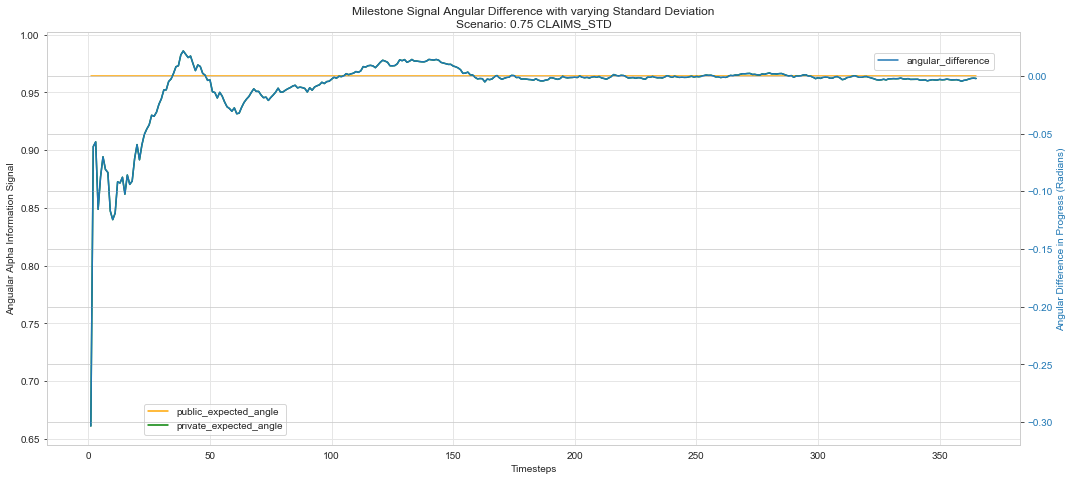

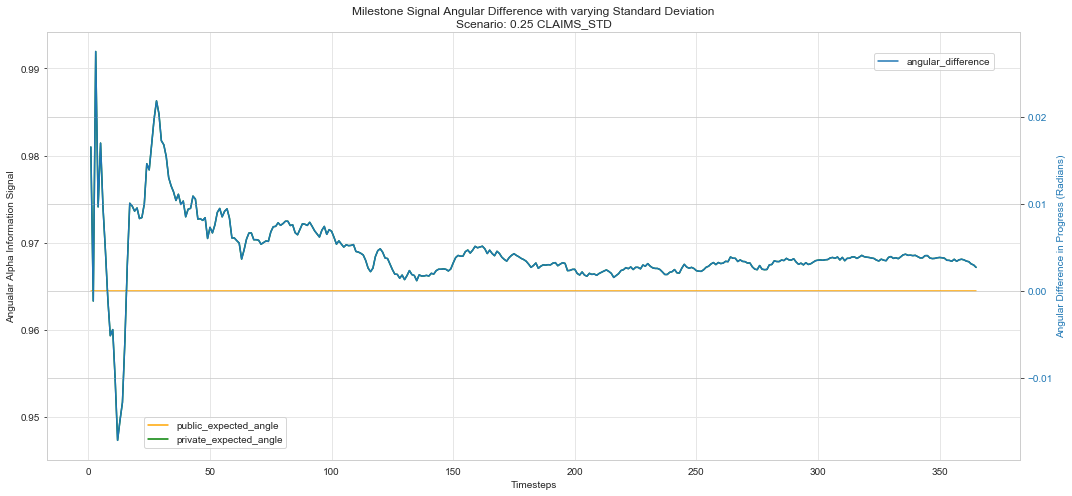

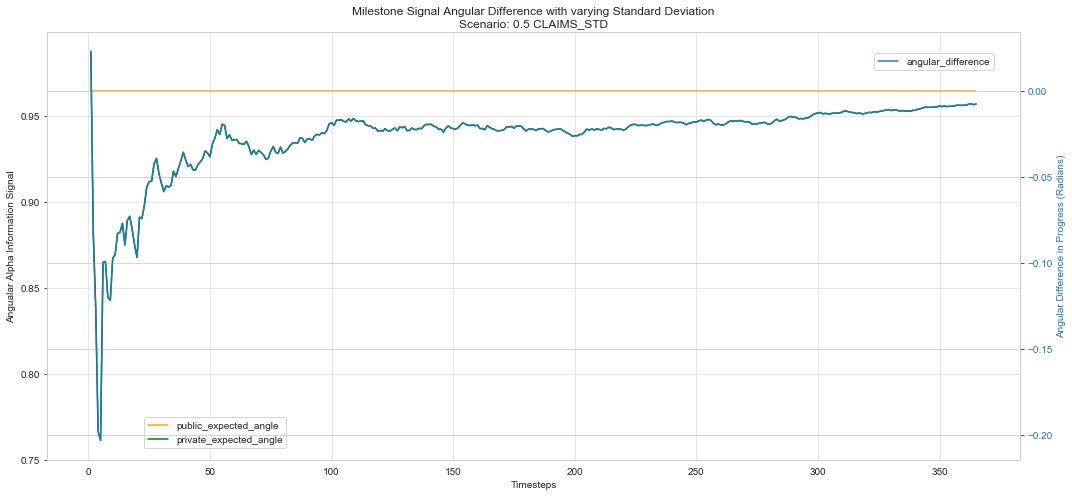

In [37]:
experiments = experiments.sort_values(by =['CLAIMS_STD']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['CLAIMS_STD']
    cc_label = experiments.iloc[cc_idx]['CLAIMS_STD']
#     secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['CLAIMS_STD']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        
        df['public_expected_angle'] = df['timestep'] / np.sqrt((df['expected_milestone_interpolation'])**2 + (df['timestep'])**2) 

        df['private_expected_angle'] = df['timestep'] / np.sqrt((df['milestone_progress'])**2 + (df['timestep'])**2) 

        df['angular_difference'] =  df['private_expected_angle'] -  df['public_expected_angle'] 
        # print(i)
        # print(df.head())
        plot_label = experiment['CLAIMS_STD']
        ax = axs
        title = 'Milestone Signal Angular Difference with varying Standard Deviation' + '\n' + 'Scenario: ' + str(cc_label)  + ' CLAIMS_STD'
        ax.set_title(title)
        ax.set_ylabel('Angualar Alpha Information Signal')
        colors = ['b','orange', 'g', 'magenta', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        # ax.plot(df.timestep, df['milestone_difference_signal'],color = colors[0], label='milestone_difference_signal')
        ax.plot(df.timestep, df['public_expected_angle'],color = colors[1], label='public_expected_angle')
        ax.plot(df.timestep, df['private_expected_angle'],color = colors[2], label='private_expected_angle')


        # ax.plot(df.timestep, df['expected_milestone_interpolation'],color = colors[2], label='expected_milestone_interpolation')


        # ax.step(milestone_df.Completion_Time, milestone_df.Completion_Percent, where='post', color='r', label='Milestone')

        ax.legend(bbox_to_anchor=(0.1, 0.1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)


        ax2 = ax.twinx()
        color_second = 'tab:blue'
        ax2.set_ylabel('Angular Difference in Progress (Radians)', color=color_second)  # we already handled the x-label with ax1
        ax2.plot(df.timestep, df['angular_difference'] , color=color_second, label='angular_difference')
        ax2.tick_params(axis='y', labelcolor=color_second)
        ax2.legend(bbox_to_anchor=(0.85, 0.95), loc=2, borderaxespad=0.)
        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()